In [9]:
import sys
import cv2
import numpy as np
from rasterio import Affine
sys.path.append('../backend')
%load_ext autoreload
%autoreload 2
from transform.coordinates import get_affine_transform
from transform.coordinates import to_web_mercator
from extract.extract import get_coordinates
from extract.extract import read_image
from transform.geotiff import geotiff
from transform.tiles import create_tiles
from matplotlib import pyplot as plt
from rasterio.shutil import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
IMAGE_PATH = '../resources/us-army-1945.jpeg'

# lat / lon convention!
LANDMARKS = {
    'Kirche St. Oswald': {         
        'pixel': (286, 2125),
        'gps': (48.619095, 14.030765)
    },
    'Laher Unteruresch': {
        'pixel': (863, 2610) , 
        'gps': (48.61017854015886, 14.04406485511563) ,
                },
    'Ruine Wittinghausen': {
        'pixel': (2919, 143),
        'gps': (48.64500581431426, 14.103290101060226),
              }, 
}

In [5]:
pixel, gps = get_coordinates(LANDMARKS)
meters = to_web_mercator(gps)
A = get_affine_transform(pixel, meters)
tif = geotiff(read_image(IMAGE_PATH), A)

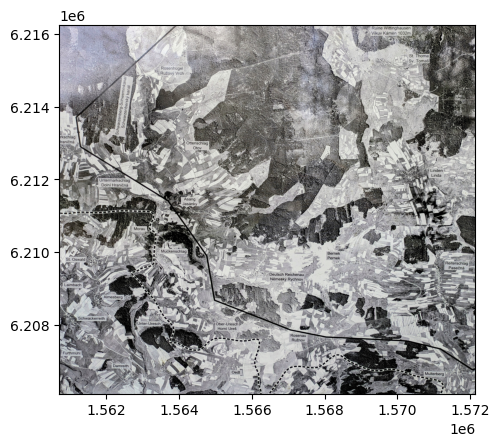

In [6]:
from rasterio.plot import show
with tif.open() as dataset:
    fig, ax = plt.subplots()
    show(dataset, ax)

In [24]:
from main import *
#Map(clear_directory)((STATIC_AUDIO_PATH, STATIC_TILES_PATH, STATIC_TOPOTHEK_PATH))
#binary_copy_file(AUDIO_PATH, STATIC_AUDIO_PATH + '/test.mp3')
#Pipe(crawl, Map(Download(STATIC_TOPOTHEK_PATH)))(EXAMPLE_TOPOTHEK_URL)
#create_raster_tif()

In [25]:
STATIC_TOPOTHEK_PATH

'../frontend/public/images'

In [26]:
from helpers.fs import download

url = 'https://lichtenau.topothek.at/data/Lichtenau301/files3363/file840955.jpg?1663488311'
image, _ = download(url)

Downloading: https://lichtenau.topothek.at/data/Lichtenau301/files3363/file840955.jpg?1663488311


In [28]:
from io import BytesIO
from PIL import Image
buffer=Image.open(BytesIO(image))
webp_io = BytesIO()
buffer.save(webp_io, format="WEBP", quality=80, method=6)
webp_bytes = webp_io.getvalue()
with open('test.webp', 'wb') as f:
    f.write(webp_bytes)

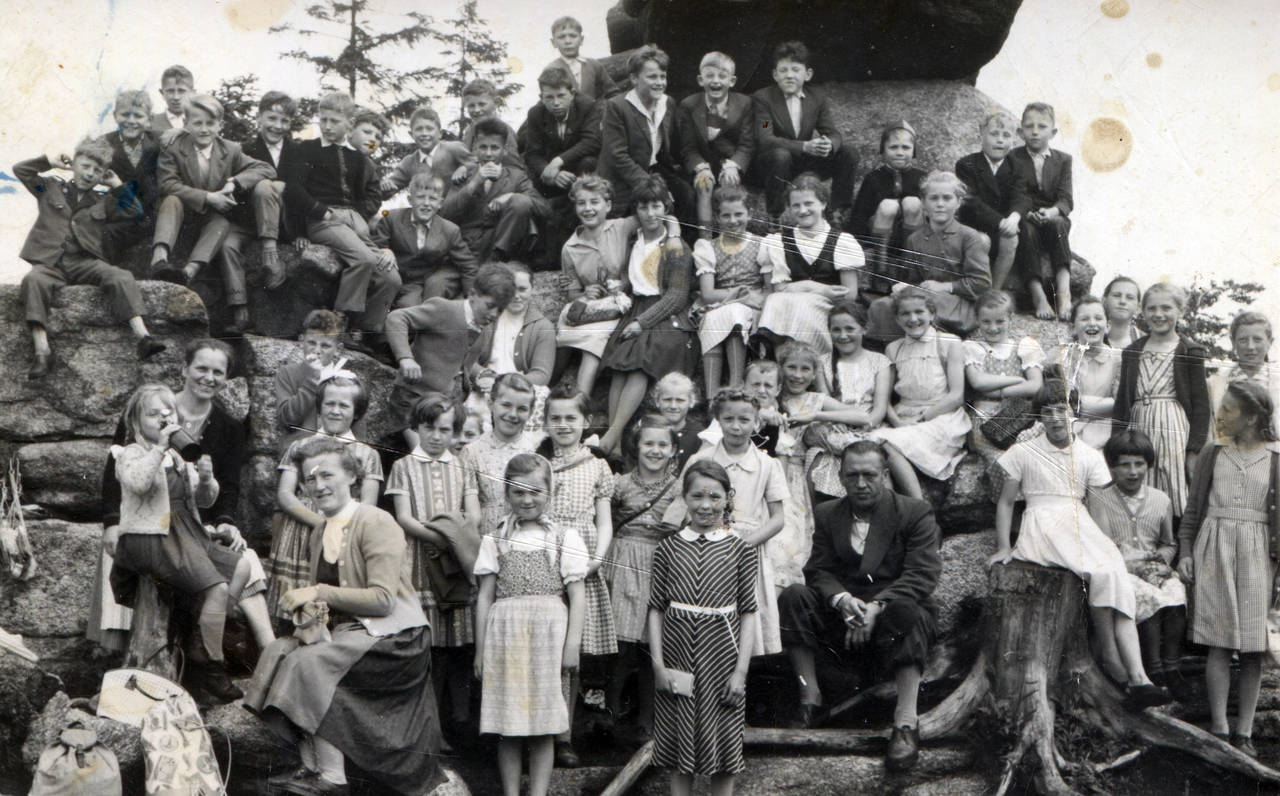

In [35]:
import requests

url = "https://debtray.fra1.cdn.digitaloceanspaces.com/test/timestrolls/file430410.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [33]:
response.

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x04\xb0\x04\xb0\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x03\x1c\x05\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x00\x07\x08\xff\xc4\x00I\x10\x00\x02\x01\x03\x03\x02\x05\x01\x06\x04\x04\x05\x02\x05\x00\x0b\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13"Qaq\x14#2B\x81\x91R\xa1\xb1\xc1\x07\x15$\xd1\x163b\xe1\xf0r\xf1%4CS\x82\x92\xc2\x17Dc\xa2&5Ts\xb2\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xc4\x00\'\x11\x01\x01\x01\x00\x02\x02\x03\x01\x01\x00\x02\x02\x03\x01\x00\x00\x00\x01\x11!1\x02A\x12Qaq\x03"\x81\x13\x91\x04\xa1\xb12\xff\xda\x